In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt

geometry_dir = os.path.join("..", "results", "artifacts", "exp13")


# List of models used in the analysis
    # "ResNet50",
    # "EfficientNetB0",
    # "ConvNeXtTiny",
    # "ViT_B16",
    # "ShapeResNet50_SIN",          # variant A: SIN only
    # "ShapeResNet50_SININ",        # variant B: SIN + IN
    # "ShapeResNet50_ShapeResNet",  # variant C: SIN+IN then finetuned on IN


target_name = "ShapeResNet50_ShapeResNet"
prefix = "exp13_geometry"

paths = {
    "texture_natural": os.path.join(
        geometry_dir, f"{prefix}_{target_name}_texture_natural.npz"
    ),
    "shape_bias": os.path.join(
        geometry_dir, f"{prefix}_{target_name}_shape_bias.npz"
    ),
}

data_nat = np.load(paths["texture_natural"], allow_pickle=True)
data_shape = np.load(paths["shape_bias"], allow_pickle=True)

list(data_nat.keys())


['coords',
 'labels',
 'peer_mask',
 'hull_vertices',
 'target_idx',
 'mix_idx',
 'context',
 'target_name',
 'w_hat',
 'explained_variance',
 'fit_ids']

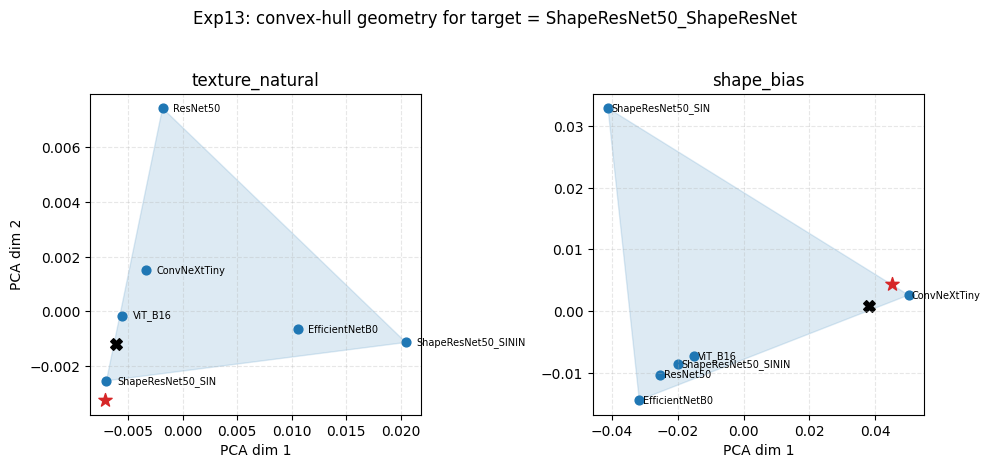

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

for ax, data, title in zip(
    axes,
    [data_nat, data_shape],
    ["texture_natural", "shape_bias"],
):
    coords = data["coords"]
    labels = data["labels"]
    peer_mask = data["peer_mask"]
    hull_vertices = data["hull_vertices"]
    target_idx = int(data["target_idx"])
    mix_idx = int(data["mix_idx"])

    peers_coords = coords[peer_mask]
    peers_labels = labels[peer_mask]
    target_coord = coords[target_idx]
    mix_coord = coords[mix_idx]
    hull_pts = peers_coords[hull_vertices]

    ax.fill(hull_pts[:, 0], hull_pts[:, 1], alpha=0.15, edgecolor="C0", facecolor="C0")
    ax.scatter(peers_coords[:, 0], peers_coords[:, 1], color="C0", s=40)
    for name, (x, y) in zip(peers_labels, peers_coords):
        ax.text(x + 0.001, y, name, fontsize=7, va="center")

    ax.scatter(mix_coord[0], mix_coord[1], marker="X", s=70, color="black")
    ax.scatter(target_coord[0], target_coord[1], marker="*", s=100, color="tab:red")
    # ax.arrow(
    #     mix_coord[0],
    #     mix_coord[1],
    #     target_coord[0] - mix_coord[0],
    #     target_coord[1] - mix_coord[1],
    #     length_includes_head=True,
    #     head_width=0.04,
    #     head_length=0.06,
    #     alpha=0.7,
    #     color="tab:red",
    # )

    ax.set_title(title)
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.set_xlabel("PCA dim 1")
axes[0].set_ylabel("PCA dim 2")

fig.suptitle(f"Exp13: convex-hull geometry for target = {target_name}", y=1.03)
plt.tight_layout()
plt.show()
